In [1]:
%%bash
python --version

Python 2.7.12


# Оптимизация в Python: глобальная оптимизация и оптимизация негладкой функции

Данное задание основано на материалах секции, посвященной оптимизационным задачам и методам из решения. Вам понадобится компьютер с установленным интерпретатором Python и подключенными библиотеками NumPy, SciPy и Matplotlib.

Вы научитесь:

1. применять библиотеку SciPy для минимизации функций
2. делать выбор между градиентными и неградиентными методами оптимизации, исходя из особенностей задачи и ваших пожеланий к итоговому решению

**Введение**

В этом задании вы научитесь решать задачи оптимизации с помощью библиотеки SciPy. Сначала вы решите задачу поиска минимума функции с помощью одного из градиентных методов оптимизации, затем увидите отличия в работе градиентного метода и одного из методов глобальной оптимизации, а в заключение – найдете глобальный минимум негладкой функции, т.е. функции, у которой не всегда определен градиент.

Понимание задачи глобальной оптимизации и отличий градиентных методов, от методов, не использующих градиент, очень полезно в задачах анализа данных, в частности, для подбора параметров алгоритмов.

**Материалы**

1. Справка по функциям пакета scipy.optimize: http://docs.scipy.org/doc/scipy/reference/optimize.html
2. Matplotlib User Guide: http://matplotlib.org/users/index.html

**Инструкция по выполнению**

Данное задание состоит из трех частей. В каждой ответом будет набор чисел, который вам нужно будет набрать через пробел в текстовом файле и загрузить. Десятичные дроби записывайте через точку.

In [2]:
import numpy as np
import scipy as sp
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os

def write_result(task_number, data) : 
    filename = "./results/result%s.txt" % task_number
    directory = os.path.dirname(filename)
    
    if not os.path.exists(directory):
        os.makedirs(directory)

    file = open(filename, 'w')
    for symbol in data:
        file.write(str(symbol) + ' ')
    file.close()
    
round_res = lambda res: '%.2f' % res

### Задача 1. Минимизация гладкой функции

1.Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]

2.В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.

3.Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.

In [4]:
f = lambda x: math.sin(x / 5.0) * math.exp(x / 10.0) + 5 * math.exp(-x / 2.0)

4.Изучите примеры использования scipy.optimize.minimize в документации Scipy (см. "Материалы")

5.Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.

In [5]:
fx = np.linspace(start=1, stop=30, num=200)
fy = map(f, fx)

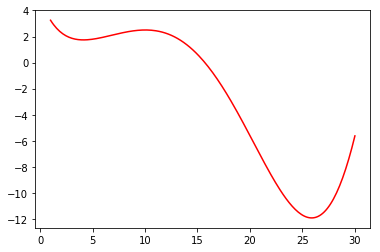

In [6]:
plt.plot(fx, fy, 'r')
plt.show()

In [7]:
minimize(f, x0=5.0)

      fun: 1.745268290331984
 hess_inv: array([[ 6.0552088]])
      jac: array([ -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 4.13628832])

In [8]:
minimize(f, x0=10)

      fun: 1.7452682903428007
 hess_inv: array([[ 6.04868658]])
      jac: array([  1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 39
      nit: 3
     njev: 13
   status: 0
  success: True
        x: array([ 4.13630013])

In [9]:
minimize(f, x0=20)

      fun: -11.898894665971952
 hess_inv: array([[ 1.68469947]])
      jac: array([ -3.33786011e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([ 25.88018742])

6.Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.

In [12]:
min_bfgs = minimize(f, x0=2.0, method='BFGS')
f_bfgs1 = f(min_bfgs.x)
print "Результат оптимизации: \n", min_bfgs
print "\nМинимум с приближением x0=2: ", min_bfgs.x
print "Значение функции в точке минимума: ", f_bfgs1

Результат оптимизации: 
      fun: 1.7452682903449388
 hess_inv: array([[ 5.98752437]])
      jac: array([ -2.07126141e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 4.13627618])

Минимум с приближением x0=2:  [ 4.13627618]
Значение функции в точке минимума:  1.74526829034


7.Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.

In [16]:
min_bfgs2 = minimize(f, x0=30, method='BFGS')
f_bfgs2 = f(min_bfgs2.x)
print "Результат оптимизации: \n", min_bfgs2
print "\nМинимум с приближением x0=30: ", min_bfgs2.x
print "Значение функции в точке минимума: ", f_bfgs2

Результат оптимизации: 
      fun: -11.898894665981285
 hess_inv: array([[ 1.67932484]])
      jac: array([  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 25.88019339])

Минимум с приближением x0=30:  [ 25.88019339]
Значение функции в точке минимума:  -11.898894666


In [17]:
write_result(1, map(round_res, [f_bfgs1, f_bfgs2]))

8.Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

### Задача 2: глобальная оптимизация

1.Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации - дифференциальную эволюцию.

2.Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.

3.Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.

4.Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.

In [18]:
min_evo = differential_evolution(f, bounds=[(1, 30)])
f_evo = f(min_evo.x)
print "Результат оптимизации: \n", min_evo
print "\nМинимум по дифф.эволюции: ", min_evo.x
print "Значение функции в точке минимума: ", f_evo

Результат оптимизации: 
     fun: -11.89889466439993
     jac: array([ -4.31654712e-05])
 message: 'Optimization terminated successfully.'
    nfev: 79
     nit: 4
 success: True
       x: array([ 25.88012012])

Минимум по дифф.эволюции:  [ 25.88012012]
Значение функции в точке минимума:  -11.8988946644


In [19]:
write_result(2, [round_res(f_evo)])

5.Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.

6.Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [20]:
print "Количество итераций в методе BFGS с хорошим начальным приближением: ", min_bfgs2.nit
print "Количество итераций в методе дифф.эволюции: ", min_evo.nit

print "Количество действий за одну итерацию в методе BFGS с хорошим начальным приближением: ", min_bfgs2.nfev
print "Количество действий за одну итерацию в методе дифф.эволюции: ", min_evo.nfev

Количество итераций в методе BFGS с хорошим начальным приближением:  6
Количество итераций в методе дифф.эволюции:  4
Количество действий за одну итерацию в методе BFGS с хорошим начальным приближением:  21
Количество действий за одну итерацию в методе дифф.эволюции:  79


### Задача 3. Минимизация негладкой функции

1.Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.

In [21]:
h = lambda x: int(f(x))

2.Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

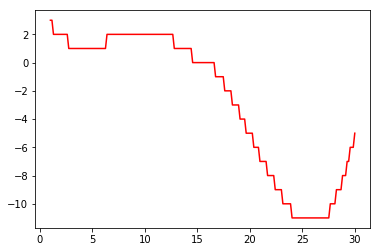

In [22]:
hx = np.linspace(start=1, stop=30, num=200)
hy = map(h, hx)
plt.plot(hx, hy, 'r')
plt.show()

3.Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.

In [23]:
minh = minimize(h, x0=30.0, method='BFGS')
h1 = h(minh.x)
print "Результат оптимизации: \n", minh
print "\nМинимум с приближением x0=30: ", minh.x
print "Значение функции в точке минимума: ", h1

Результат оптимизации: 
      fun: -5
 hess_inv: array([[1]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 30.])

Минимум с приближением x0=30:  [ 30.]
Значение функции в точке минимума:  -5


4.Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.

In [24]:
minh_evo = differential_evolution(h, bounds=[(1, 30)])
h_evo = h(minh_evo.x)
print "Результат оптимизации: \n", minh_evo
print "\nМинимум по дифф.эволюции: ", minh_evo.x
print "Значение функции в точке минимума: ", h_evo

Результат оптимизации: 
     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 62
     nit: 3
 success: True
       x: array([ 26.59278516])

Минимум по дифф.эволюции:  [ 26.59278516]
Значение функции в точке минимума:  -11


In [25]:
write_result(3, [h1, h_evo])

5.Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

6.Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.